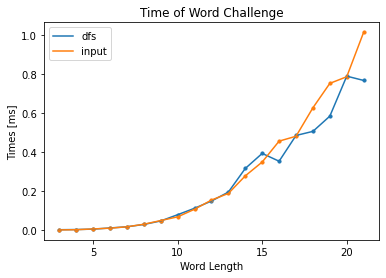

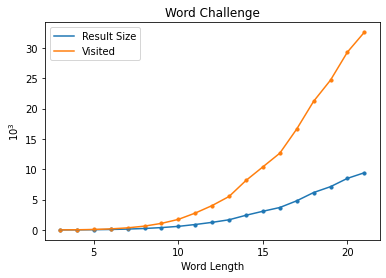

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import os

paths = ["word_challenge_dfs.csv", "word_challenge_normal.csv"]
labels = ["dfs", "input"]

dfs = [pd.read_csv(f, sep=" ") for f in paths]
x = dfs[0]["word_length"]
marker_size = 10
x_ticks = [5,10,15,20]

# Time
for i, df in enumerate(dfs):
    plt.plot(x, df["time[ms]"], label=labels[i])
    plt.scatter(x, df["time[ms]"], s=marker_size)

plt.title("Time of Word Challenge")
plt.xlabel('Word Length')
plt.ylabel('Times [ms]')
plt.xticks(x_ticks)
plt.legend()
plt.show()

# Nodes and Result Size
df = dfs[0]
y1 = df["avg_result_size"]   / 10**3
y2 = df["avg_visited_nodes"] / 10**3
plt.plot(x, y1, label="Result Size")
plt.scatter(x, y1, s=marker_size)

plt.plot(x, y2, label="Visited")
plt.scatter(x, y2, s=marker_size)

plt.title("Word Challenge")
plt.xlabel('Word Length')
plt.ylabel('$10^3$')
plt.xticks(x_ticks)
plt.legend()
plt.show()

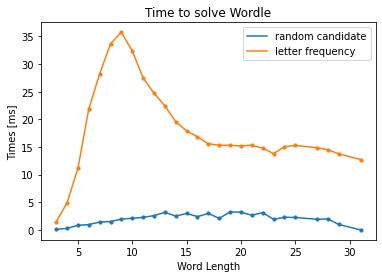

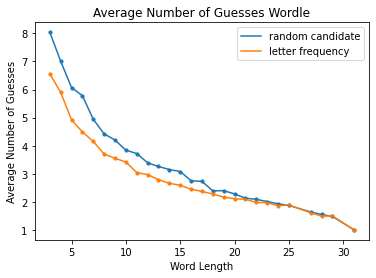

In [37]:

paths = ["wordle_random_candidate.csv", "wordle_letter_frequency.csv"]
labels = ["random candidate", "letter frequency"]

dfs = [pd.read_csv(f, sep=" ") for f in paths]
x = dfs[0]["word_length"]
marker_size = 10

x_ticks = [5,10,15,20,25,30]

# Time
for i, df in enumerate(dfs):
    plt.plot(x, df["time[ms]"], label=labels[i])
    plt.scatter(x, df["time[ms]"], s=marker_size)

plt.title("Time to solve Wordle")
plt.xlabel('Word Length')
plt.ylabel('Times [ms]')
plt.xticks(x_ticks)
plt.legend()
plt.show()


# Guesses
for i, df in enumerate(dfs):
    plt.plot(x, df["avg_guesses"], label=labels[i])
    plt.scatter(x, df["avg_guesses"], s=marker_size)

plt.title("Average Number of Guesses Wordle")
plt.xlabel('Word Length')
plt.ylabel('Average Number of Guesses')
plt.xticks(x_ticks)
plt.legend()
plt.show()
